## Carga de datos

In [1]:
import pandas as pd

In [2]:
business_raw = pd.read_csv("../../data/raw/business_raw.csv.gz")

In [3]:
eval(business_raw['attributes'].loc[1])

{'RestaurantsAttire': "'casual'",
 'RestaurantsGoodForGroups': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'OutdoorSeating': 'True',
 'GoodForKids': 'True',
 'Alcohol': "u'none'",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
 'DogsAllowed': 'False',
 'RestaurantsTableService': 'False',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'no'",
 'RestaurantsPriceRange2': '1',
 'RestaurantsReservations': 'False',
 'HasTV': 'True',
 'RestaurantsDelivery': 'True',
 'CoatCheck': 'False',
 'Caters': 'False',
 'RestaurantsTakeOut': 'True',
 'DriveThru': 'True',
 'HappyHour': 'False',
 'WheelchairAccessible': 'True'}

### limpieza de atributos

In [4]:
import ast

def extract_values(row):
    try:
        attributes_dict = ast.literal_eval(row['attributes'])
        take_out = attributes_dict.get('RestaurantsTakeOut', None)
        delivery = attributes_dict.get('RestaurantsDelivery', None)
        good_for_kids = attributes_dict.get('GoodForKids', None)
        accepts_credit_cards = attributes_dict.get('BusinessAcceptsCreditCards', None)
        reservations = attributes_dict.get('RestaurantsReservations', None)
        wifi = attributes_dict.get('WiFi',None)
        dogs_allowed = attributes_dict.get('DogsAllowed',None)
        alcohol = attributes_dict.get('Alcohol',None)

        return pd.Series({
            'RestaurantsTakeOut': take_out,
            'RestaurantsDelivery': delivery,
            'GoodForKids': good_for_kids,
            'BusinessAcceptsCreditCards': accepts_credit_cards,
            'RestaurantsReservations': reservations,
            'wifi': wifi,
            'dogs_allowed' : dogs_allowed,
            'alcohol': alcohol
        })
    except (SyntaxError, ValueError):
        return pd.Series({
            'RestaurantsTakeOut': None,
            'RestaurantsDelivery': None,
            'GoodForKids': None,
            'BusinessAcceptsCreditCards': None,
            'RestaurantsReservations': None,
            'wifi': None,
            'dogs_allowed': None,
            'alcohol': None
        })
        
# Aplica la función a cada fila y crea nuevas columnas
new_columns = business_raw.apply(extract_values, axis=1)

# Concatena las nuevas columnas al DataFrame original
df_business = pd.concat([business_raw, new_columns], axis=1)

In [5]:

df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'GoodForKids', 'BusinessAcceptsCreditCards',
       'RestaurantsReservations', 'wifi', 'dogs_allowed', 'alcohol'],
      dtype='object')

In [6]:
use_columns= ['business_id', 'name', 'city', 'state',
       'latitude', 'longitude', 'categories', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'GoodForKids', 'BusinessAcceptsCreditCards',
       'RestaurantsReservations', 'wifi', 'dogs_allowed', 'alcohol']


df_business = df_business[use_columns]

In [7]:
# Alcohol

dic_remplace = {"u'none'" : 0,
 "'none'": 0,
 "u'beer_and_wine'":1,
 "u'full_bar'": 1,
 "'beer_and_wine'": 1,
 "'full_bar'" : 1 }

df_business['alcohol'] = df_business['alcohol'].map(dic_remplace)
df_business['alcohol'] = df_business['alcohol'].fillna(0)

In [8]:
# dogs_allowed

df_business['dogs_allowed'] = df_business['dogs_allowed'].fillna(-1).replace('False',0).replace('True',1)

# 

/tmp/ipykernel_9994/3161066067.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_business['dogs_allowed'] = df_business['dogs_allowed'].fillna(-1).replace('False',0).replace('True',1)


In [9]:
#wifi

dic_remplace = {
    "u'no'": None,
    None: None,
    "'free'": 0,
    "u'free'": 0,
    "'no'": None,
    'None': None,
    "u'paid'": 1,
    "'paid'": 1
}

df_business['wifi'] = df_business['wifi'].map(dic_remplace)
df_business['wifi'] = df_business['wifi'].fillna(0)

In [10]:
#RestaurantsReservations
dic_replace = {
    'False': 0,
    None: None,
    'True': 1,
    'None': None
}

df_business['RestaurantsReservations'] = df_business['RestaurantsReservations'].map(dic_replace)
df_business['RestaurantsReservations'] = df_business['RestaurantsReservations'].fillna(0)

In [11]:
#BusinessAcceptsCreditCards
dic_replace = {
    'False': 0,
    None: None,
    'True': 1,
    'None': None
}

df_business['BusinessAcceptsCreditCards'] = df_business['BusinessAcceptsCreditCards'].map(dic_replace)
df_business['BusinessAcceptsCreditCards'] = df_business['BusinessAcceptsCreditCards'].fillna(0)


In [12]:
#GoodForKids
dic_replace = {
    'False': 0,
    None: None,
    'True': 1,
    'None': None
}

df_business['GoodForKids'] = df_business['GoodForKids'].map(dic_replace)
df_business['GoodForKids'] = df_business['GoodForKids'].fillna(0)

In [13]:
#RestaurantsDelivery
dic_replace = {
    'False': 0,
    None: None,
    'True': 1,
    'None': None
}

df_business['RestaurantsDelivery'] = df_business['RestaurantsDelivery'].map(dic_replace)
df_business['RestaurantsDelivery'] = df_business['RestaurantsDelivery'].fillna(0)

In [14]:

dic_replace = {
    'False': 0,
    None: None,
    'True': 1,
    'None': None
}

df_business['RestaurantsTakeOut'] = df_business['RestaurantsTakeOut'].map(dic_replace)
df_business['RestaurantsTakeOut'] = df_business['RestaurantsTakeOut'].fillna(0)

## Categorias

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar los datos en un DataFrame


# Función para limpiar y preprocesar el texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text.lower())
    # Eliminar stopwords y signos de puntuación
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

# Aplicar preprocesamiento al DataFrame
df_business['tokens'] = df_business['categories'].apply(preprocess_text)

# Contar la frecuencia de palabras
all_words = [word for tokens in df_business['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Visualizar las palabras más comunes
print(word_freq.most_common(10))


[nltk_data] Downloading package punkt to /home/pc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('food', 8880), ('restaurant', 6473), ('fast', 6472), ('burger', 2636), ('sandwich', 1420), ('chicken', 1286), ('american', 1127), ('mexican', 870), ('wing', 802), ('tea', 749)]


In [16]:
df_business['categories'] = df_business['tokens'].apply(' '.join)

In [17]:

columnas_categoricas = ['RestaurantsTakeOut', 'RestaurantsDelivery', 'GoodForKids', 'BusinessAcceptsCreditCards', 'RestaurantsReservations','wifi','dogs_allowed','alcohol']

df_business[columnas_categoricas] = df_business[columnas_categoricas].astype('category')

In [18]:
df_business['categories'].str.split()

0       [burger, fast, food, sandwich, food, ice, crea...
1       [ice, cream, frozen, yogurt, fast, food, burge...
2       [sporting, good, sport, wear, fashion, restaur...
3                      [sandwich, fast, food, restaurant]
4                       [mexican, fast, food, restaurant]
                              ...                        
6467    [chicken, shop, caterer, fast, food, restauran...
6468         [restaurant, fast, food, sandwich, hot, dog]
6469                   [restaurant, fast, food, sandwich]
6470    [american, traditional, diner, breakfast, brun...
6471    [restaurant, pizza, fast, food, chicken, wing,...
Name: categories, Length: 6472, dtype: object

In [19]:
import pandas as pd

categorias_usar =['burger','sandwich','chicken','breakfast','ice','mexican','american']

new_categorical_cols = pd.DataFrame(columns=categorias_usar)

# Iterate through each row of 'df_business'
for idx, row in df_business.iterrows():
    # Dividir la cadena de tokens en una lista de tokens
    token_list = row['tokens']
    # Encontrar ocurrencias de categorías en la lista de tokens
    category_occurrences = {category: 1 if category.lower() in token_list else 0 for category in categorias_usar}
    # Añadir las ocurrencias como una nueva fila en el nuevo DataFrame
    new_categorical_cols.loc[idx] = category_occurrences

# Combinar las nuevas columnas categóricas con el DataFrame original
df_business = pd.concat([df_business, new_categorical_cols], axis=1)

# Imprimir el DataFrame modificado


## modelo de recomendacion

In [20]:
df_business.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'categories', 'RestaurantsTakeOut', 'RestaurantsDelivery',
       'GoodForKids', 'BusinessAcceptsCreditCards', 'RestaurantsReservations',
       'wifi', 'dogs_allowed', 'alcohol', 'tokens', 'burger', 'sandwich',
       'chicken', 'breakfast', 'ice', 'mexican', 'american'],
      dtype='object')

In [21]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes un DataFrame 'df' con tus datos
# Aquí un ejemplo de cómo podría ser la estructura del DataFrame
features = ['latitude','longitude','RestaurantsTakeOut', 'RestaurantsDelivery',
       'GoodForKids', 'BusinessAcceptsCreditCards', 'RestaurantsReservations',
       'wifi', 'dogs_allowed', 'alcohol','burger', 'sandwich',
       'chicken', 'breakfast', 'ice', 'mexican', 'american']

# scaler = StandardScaler()
# business_scale = scaler.fit_transform(df_business[features])

X = df_business[features]


# Entrenar el modelo k-NN

k = 5  # número de vecinos más cercanos que quieres encontrar
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')

knn_model.fit(X)


NearestNeighbors(metric='euclidean')

In [22]:
test_1 = X.sample(1)
test_1
print(test_1)

index = knn_model.kneighbors(test_1,5)[1][0]
df_business.loc[index]

       latitude   longitude RestaurantsTakeOut RestaurantsDelivery  \
5507  53.541634 -113.610427                1.0                 1.0   

     GoodForKids BusinessAcceptsCreditCards RestaurantsReservations wifi  \
5507         1.0                        1.0                     0.0  0.0   

     dogs_allowed alcohol  burger  sandwich  chicken  breakfast  ice  mexican  \
5507           -1     0.0       1         0        0          1    0        0   

      american  
5507         0  


,business_id,name,city,state,latitude,longitude,categories,RestaurantsTakeOut,RestaurantsDelivery,GoodForKids,...,dogs_allowed,alcohol,tokens,burger,sandwich,chicken,breakfast,ice,mexican,american
5507,5DFvFAo3zI7sMPspDZKGNg,A&W,Edmonton,NV,53.541634,-113.610427,breakfast brunch burger restaurant fast food,1.0,1.0,1.0,...,-1,0.0,"[breakfast, brunch, burger, restaurant, fast, ...",1,0,0,1,0,0,0
5142,mJVNXkfExLzzsXvbaY-ymw,McDonald's,Edmonton,IN,53.540827,-113.610416,fast food burger restaurant food coffee tea,1.0,1.0,1.0,...,-1,0.0,"[fast, food, burger, restaurant, food, coffee,...",1,0,0,0,0,0,0
1271,H5cH1BbNfP5YEkytAQaYrg,McDonald's,Edmonton,MO,53.525341,-113.617477,restaurant food coffee tea fast food burger,1.0,1.0,1.0,...,-1,0.0,"[restaurant, food, coffee, tea, fast, food, bu...",1,0,0,0,0,0,0
6326,GrfFulYVrfWIKmwa1dHktg,McDonald's,Edmonton,PA,53.519752,-113.594726,restaurant burger coffee tea fast food food,1.0,1.0,1.0,...,-1,0.0,"[restaurant, burger, coffee, tea, fast, food, ...",1,0,0,0,0,0,0
6206,bnY1-1e0XdPz6zTrG5dacA,McDonald's,Edmonton,PA,53.559259,-113.578631,burger restaurant coffee tea food fast food,1.0,1.0,1.0,...,-1,0.0,"[burger, restaurant, coffee, tea, food, fast, ...",1,0,0,0,0,0,0


In [23]:
knn_model.kneighbors(test_1,5)[1]

df_business.loc[[5564, 2813, 6187, 1363, 3744]]

,business_id,name,city,state,latitude,longitude,categories,RestaurantsTakeOut,RestaurantsDelivery,GoodForKids,...,dogs_allowed,alcohol,tokens,burger,sandwich,chicken,breakfast,ice,mexican,american
5564,b8jbsZHfrGZCVPjI9KXV_g,McDonald's,Carpinteria,PA,34.396815,-119.512362,fast food burger coffee tea restaurant food,1.0,1.0,1.0,...,-1,0.0,"[fast, food, burger, coffee, tea, restaurant, ...",1,0,0,0,0,0,0
2813,5tkZfqkwx6axbN9P5UlC8w,Taco Bell,Carpinteria,PA,34.396607,-119.513420,restaurant fast food mexican taco,1.0,1.0,1.0,...,-1,0.0,"[restaurant, fast, food, mexican, taco]",0,0,0,0,0,1,0
6187,kAGknILVe6xCv9a2uc5JHw,Subway,Carpinteria,NJ,34.396137,-119.514270,restaurant fast food sandwich breakfast brunch,1.0,1.0,1.0,...,-1,0.0,"[restaurant, fast, food, sandwich, breakfast, ...",0,1,0,1,0,0,0
1363,Sa1G0j7YGs0mSa-mU4tvgg,Carl's Jr,Carpinteria,AZ,34.402497,-119.524846,burger restaurant fast food,1.0,1.0,1.0,...,-1,0.0,"[burger, restaurant, fast, food]",1,0,0,0,0,0,0
3744,Fg68C3AwFu74dXMhgX3qIw,Carl's Jr,Santa Barbara,PA,34.421637,-119.678440,burger fast food restaurant,1.0,1.0,1.0,...,-1,0.0,"[burger, fast, food, restaurant]",1,0,0,0,0,0,0


#### exportar el modelo

In [24]:
import pickle
# Nombre del archivo de salida
nombre_archivo = 'modelo1_knn.pkl'

# Exportar el objeto a un archivo PKL
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(knn_model, archivo)

### lectura

In [25]:
nombre_archivo = 'modelo1_knn.pkl'

# Leer el objeto desde el archivo PKL
with open(nombre_archivo, 'rb') as archivo:
    objeto = pickle.load(archivo)

In [26]:
X.columns

Index(['latitude', 'longitude', 'RestaurantsTakeOut', 'RestaurantsDelivery',
       'GoodForKids', 'BusinessAcceptsCreditCards', 'RestaurantsReservations',
       'wifi', 'dogs_allowed', 'alcohol', 'burger', 'sandwich', 'chicken',
       'breakfast', 'ice', 'mexican', 'american'],
      dtype='object')

In [27]:
example = [36	,-87	,1.0	,1.0	,1.0,	1.0,	0.0,	0.0,	0	,0.0,	1	,1	,0,	0	,1,	0	,0]

index = objeto.kneighbors([example],5)[1][0]
df_business.loc[index]

/home/pc/Documentos/henry/Google_Yelp_Recommend/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,business_id,name,city,state,latitude,longitude,categories,RestaurantsTakeOut,RestaurantsDelivery,GoodForKids,...,dogs_allowed,alcohol,tokens,burger,sandwich,chicken,breakfast,ice,mexican,american
0,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,AZ,36.269593,-87.058943,burger fast food sandwich food ice cream froze...,1.0,1.0,1.0,...,0,0.0,"[burger, fast, food, sandwich, food, ice, crea...",1,1,0,0,1,0,0
2948,G3Zd640VOpMgxXizb6aO6A,Sonic Drive-In,Nashville,FL,36.046213,-86.949991,ice cream frozen yogurt burger restaurant food...,1.0,1.0,1.0,...,0,0.0,"[ice, cream, frozen, yogurt, burger, restauran...",1,0,0,0,1,0,0
395,HlSve6o5TAXbl4UDwCfcFw,Sonic Drive-In,Nashville,CA,36.078544,-86.953119,ice cream frozen yogurt food restaurant fast f...,1.0,1.0,1.0,...,0,0.0,"[ice, cream, frozen, yogurt, food, restaurant,...",1,0,0,0,1,0,0
1200,O-OSPZU1gBTQUSGr2VLalg,Sonic Drive-In,Franklin,IL,35.997447,-86.885020,burger ice cream frozen yogurt food hot dog re...,1.0,1.0,1.0,...,0,0.0,"[burger, ice, cream, frozen, yogurt, food, hot...",1,0,0,0,1,0,0
5379,10OSC62m0RCrF8aaK0aemQ,Sonic Drive-In,Kingston Springs,PA,36.086866,-87.100238,ice cream frozen yogurt fast food food burger ...,1.0,1.0,1.0,...,0,0.0,"[ice, cream, frozen, yogurt, fast, food, food,...",1,0,0,0,1,0,0


In [28]:
df_business

,business_id,name,city,state,latitude,longitude,categories,RestaurantsTakeOut,RestaurantsDelivery,GoodForKids,...,dogs_allowed,alcohol,tokens,burger,sandwich,chicken,breakfast,ice,mexican,american
0,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,AZ,36.269593,-87.058943,burger fast food sandwich food ice cream froze...,1.0,1.0,1.0,...,0,0.0,"[burger, fast, food, sandwich, food, ice, crea...",1,1,0,0,1,0,0
1,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,MO,36.208102,-86.768170,ice cream frozen yogurt fast food burger resta...,1.0,1.0,1.0,...,0,0.0,"[ice, cream, frozen, yogurt, fast, food, burge...",1,0,0,0,1,0,0
2,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,Reno,PA,39.476518,-119.784037,sporting good sport wear fashion restaurant fa...,0.0,0.0,0.0,...,0,0.0,"[sporting, good, sport, wear, fashion, restaur...",0,1,0,0,0,0,0
3,VZzivJEbmHItOxNXJB3SpA,Subway,Brentwood,TN,36.026363,-86.789473,sandwich fast food restaurant,1.0,1.0,1.0,...,-1,0.0,"[sandwich, fast, food, restaurant]",0,1,0,0,0,0,0
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,IN,27.894167,-82.779866,mexican fast food restaurant,1.0,1.0,1.0,...,-1,0.0,"[mexican, fast, food, restaurant]",0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,Agh0Z_PACmbdEpLyjvuwZg,Chick-fil-A,Whitestown,FL,39.949502,-86.349949,chicken shop caterer fast food restaurant even...,1.0,1.0,0.0,...,0,0.0,"[chicken, shop, caterer, fast, food, restauran...",0,0,1,0,0,0,0
6468,oNeZmmoO7OCyT2vSsVnGKw,Coney Island Sandwich Shop,St Petersburg,NJ,27.774380,-82.646986,restaurant fast food sandwich hot dog,1.0,0.0,1.0,...,-1,0.0,"[restaurant, fast, food, sandwich, hot, dog]",0,1,0,0,0,0,0
6469,C96ynw3G1KrqBOdafxbTKw,Subway,Sun City Center,FL,27.714605,-82.335851,restaurant fast food sandwich,1.0,1.0,1.0,...,-1,0.0,"[restaurant, fast, food, sandwich]",0,1,0,0,0,0,0
6470,5ufcSii8MbAI3Yn5BQq2tA,Denny's,Fenton,NJ,38.541507,-90.467582,american traditional diner breakfast brunch re...,1.0,0.0,1.0,...,-1,0.0,"[american, traditional, diner, breakfast, brun...",0,0,0,1,0,0,1


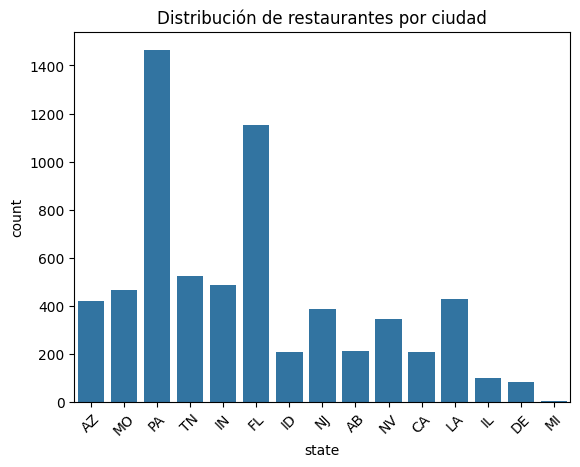

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
datos = df_business

# Visualizar los datos
sns.countplot(x='state', data=datos)
plt.xticks(rotation=45)
plt.title('Distribución de restaurantes por ciudad')
plt.show()



In [34]:
df_business['index'] = df_business.index

In [35]:
df_business

,business_id,name,city,state,latitude,longitude,categories,RestaurantsTakeOut,RestaurantsDelivery,GoodForKids,...,alcohol,tokens,burger,sandwich,chicken,breakfast,ice,mexican,american,index
0,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,AZ,36.269593,-87.058943,burger fast food sandwich food ice cream froze...,1.0,1.0,1.0,...,0.0,"[burger, fast, food, sandwich, food, ice, crea...",1,1,0,0,1,0,0,0
1,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,MO,36.208102,-86.768170,ice cream frozen yogurt fast food burger resta...,1.0,1.0,1.0,...,0.0,"[ice, cream, frozen, yogurt, fast, food, burge...",1,0,0,0,1,0,0,1
2,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,Reno,PA,39.476518,-119.784037,sporting good sport wear fashion restaurant fa...,0.0,0.0,0.0,...,0.0,"[sporting, good, sport, wear, fashion, restaur...",0,1,0,0,0,0,0,2
3,VZzivJEbmHItOxNXJB3SpA,Subway,Brentwood,TN,36.026363,-86.789473,sandwich fast food restaurant,1.0,1.0,1.0,...,0.0,"[sandwich, fast, food, restaurant]",0,1,0,0,0,0,0,3
4,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,Largo,IN,27.894167,-82.779866,mexican fast food restaurant,1.0,1.0,1.0,...,0.0,"[mexican, fast, food, restaurant]",0,0,0,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,Agh0Z_PACmbdEpLyjvuwZg,Chick-fil-A,Whitestown,FL,39.949502,-86.349949,chicken shop caterer fast food restaurant even...,1.0,1.0,0.0,...,0.0,"[chicken, shop, caterer, fast, food, restauran...",0,0,1,0,0,0,0,6467
6468,oNeZmmoO7OCyT2vSsVnGKw,Coney Island Sandwich Shop,St Petersburg,NJ,27.774380,-82.646986,restaurant fast food sandwich hot dog,1.0,0.0,1.0,...,0.0,"[restaurant, fast, food, sandwich, hot, dog]",0,1,0,0,0,0,0,6468
6469,C96ynw3G1KrqBOdafxbTKw,Subway,Sun City Center,FL,27.714605,-82.335851,restaurant fast food sandwich,1.0,1.0,1.0,...,0.0,"[restaurant, fast, food, sandwich]",0,1,0,0,0,0,0,6469
6470,5ufcSii8MbAI3Yn5BQq2tA,Denny's,Fenton,NJ,38.541507,-90.467582,american traditional diner breakfast brunch re...,1.0,0.0,1.0,...,0.0,"[american, traditional, diner, breakfast, brun...",0,0,0,1,0,0,1,6470


In [36]:
df_business.to_csv('../../data/data_ml/business_ml.csv.gz',compression='gzip',index=False)

In [39]:
pd.read_csv('../../data/data_ml/business_ml.csv.gz').columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'categories', 'RestaurantsTakeOut', 'RestaurantsDelivery',
       'GoodForKids', 'BusinessAcceptsCreditCards', 'RestaurantsReservations',
       'wifi', 'dogs_allowed', 'alcohol', 'tokens', 'burger', 'sandwich',
       'chicken', 'breakfast', 'ice', 'mexican', 'american', 'index'],
      dtype='object')